In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
pd.set_option('display.max_columns', None)

Data = pd.read_csv("smalldata.csv")
#print(Data.head())

#Steage 1
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime','appearedTimeOfDay', 'appearedHour','appearedMinute',\
             'appearedDay',  'appearedMonth',  'appearedYear','terrainType', 'closeToWater', 'gymDistanceKm','city', 'continent','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure','class' ]
Selection = ['pokemonId', 'latitude', 'longitude', 'appearedHour','appearedMinute',\
            'terrainType', 'closeToWater', 'gymDistanceKm','weather', 'temperature', \
             'windSpeed', 'windBearing', 'pressure',\
            'class' ]
ReducedData = Data.loc[:, Selection]
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,Foggy,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,Foggy,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,Clear,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,PartlyCloudy,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,PartlyCloudy,15.6,5.84,160,1020.52,133


In [108]:
ReducedData['weather']= ReducedData['weather'].astype('category')
catedict = dict(enumerate(ReducedData['weather'].cat.categories))
ReducedData['weather'] = ReducedData['weather'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,False,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,False,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,False,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,True,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,True,0.210543,4,15.6,5.84,160,1020.52,133


In [110]:
ReducedData['closeToWater'] = ReducedData['closeToWater'].astype('category')
catedict2 = dict(enumerate(ReducedData['closeToWater'].cat.categories))
ReducedData['closeToWater'] = ReducedData['closeToWater'].cat.codes
ReducedData.head()

,pokemonId,latitude,longitude,appearedHour,appearedMinute,terrainType,closeToWater,gymDistanceKm,weather,temperature,windSpeed,windBearing,pressure,class
0,16,20.525745,-97.460829,5,57,14,0,0.049869,1,25.5,4.79,269,1018.02,16
1,133,20.523695,-97.461167,5,57,14,0,0.259156,1,25.5,4.79,269,1018.02,133
2,16,38.903590,-77.199780,5,57,13,0,0.489886,0,24.2,4.29,218,1015.29,16
3,13,47.665903,-122.312561,5,56,0,1,0.359309,4,15.6,5.84,160,1020.52,13
4,133,47.666454,-122.311628,5,56,0,1,0.210543,4,15.6,5.84,160,1020.52,133


In [113]:
Datamaxtrix = ReducedData.as_matrix()

C:\WorkSpace\Python\Big Data\project\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [124]:
x = np.array(Datamaxtrix[:,3:-1])
y = np.array(Datamaxtrix[:,1:3])
print(np.shape(x))
print(np.shape(y))

(300, 10)
(300, 2)


In [134]:
randomindex = np.random.choice(300, 300, replace=False)

In [135]:
#Reindex
x = x[randomindex,:]
y = y[randomindex,:]
#Split into Training and Testing
x_train = x[0:280,:]
x_test = x[280:300,:]
y_train = y[0:280,:]
y_test = y[280:300,:]
print(np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test))

(280, 10) (20, 10) (280, 2) (20, 2)


In [144]:
from sklearn import linear_model
from sklearn import ensemble

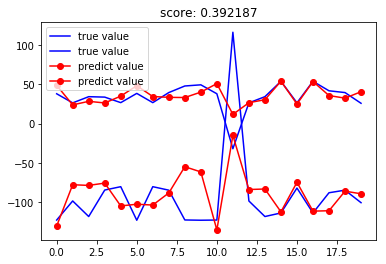

In [146]:
model_LinearRegression = linear_model.LinearRegression()
model = model_LinearRegression 
model.fit(x_train,y_train)
score = model.score(x_test, y_test)
result = model.predict(x_test)
plt.figure()
plt.plot(np.arange(len(result)), y_test,'b',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.title('score: %f'%score)
plt.legend()